In [4]:
#import mysklearn.mypytable
#from mypytable import MyPyTable
#from mysklearn.mypytable import MyPyTable
import matplotlib.pyplot as plt
import random
from mysklearn.myutils import plot_histograms,run_all, plot_frequency_diagram, plot_scatterplots, discretize_num_calls,discretize_pss_score,discretize_screen_on_time,discretize_num_sms,discretize_sleep_time,discretizer_100,round_columns_to_three_decimals

In [5]:
myTable = MyPyTable().load_from_file("stress_detection.csv")
discretize_pss_score(myTable)
discretize_num_calls(myTable)
discretize_num_sms(myTable)
discretize_screen_on_time(myTable)
discretize_sleep_time(myTable)
myTable.save_to_file("cleaned_data.csv")
myTable2 = MyPyTable().load_from_file("stress_detection.csv")

NameError: name 'MyPyTable' is not defined

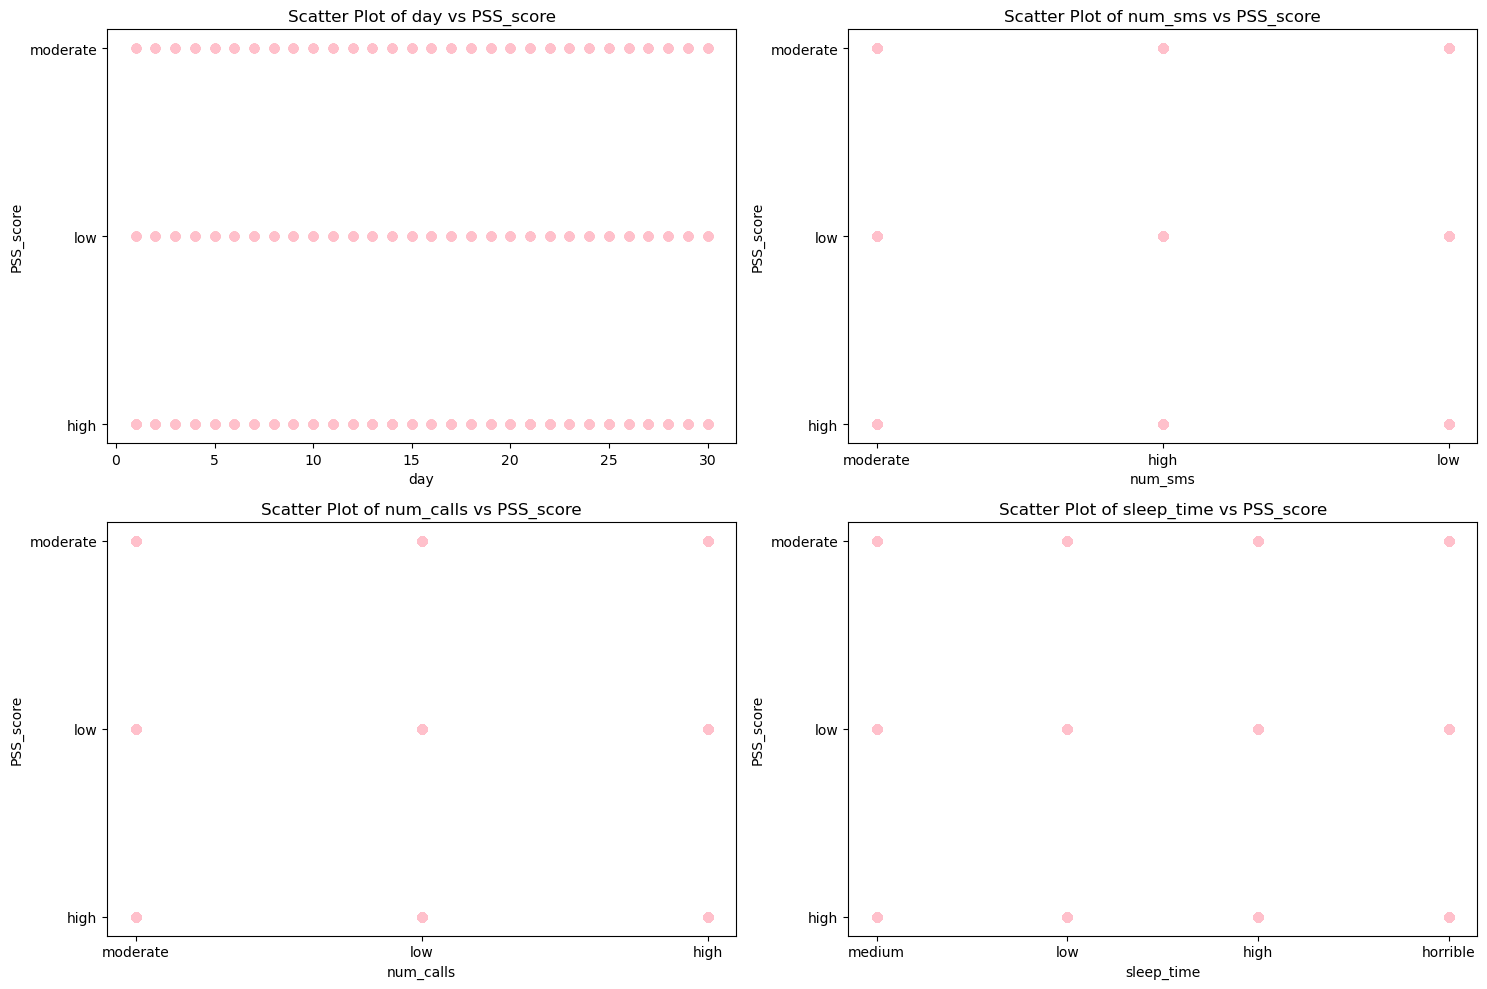

In [ ]:
# Define pairs of attributes for scatter plots
#scatter_pairs = [('PSS_score', 'screen_on_time'), ('PSS_score', 'sleep_duration'), ('PSS_score', 'wake_time'), ('PSS_score', 'sleep_time')]
scatter_pairs = [('screen_on_time', 'PSS_score'), ('num_sms', 'PSS_score'), ('num_calls', 'PSS_score'), ('sleep_time', 'PSS_score')]
# Plot scatter plots for the selected pairs
plot_scatterplots(myTable, scatter_pairs)

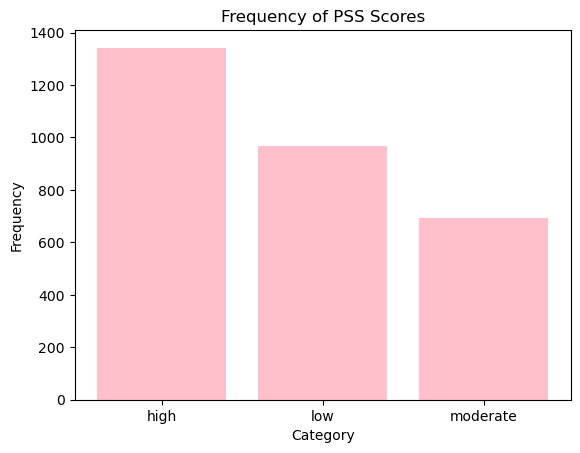

In [ ]:
# Read and process the CSV file
with open("cleaned_data.csv") as file: 
    data = [line.strip().split(",") for line in file.readlines()]
    
# Extract the header and data rows
header = data[0]
rows = data[1:]

# Get the index of the PSS_score column
pss_score_index = header.index("PSS_score")

# Extract the PSS_score values
pss_scores = [row[pss_score_index] for row in rows]

# Define labels for the bar chart
labels = ["high", "low", "moderate"]

# Call the function
plot_frequency_diagram(pss_scores, labels, "Frequency of PSS Scores")
#Pull 650 of each classification to use for random forest classifer

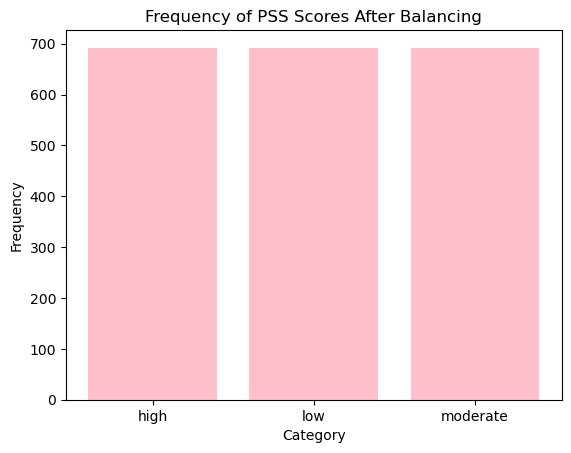

In [ ]:
stress_data = MyPyTable()
stress_data.load_from_file("cleaned_data.csv")

# delete 700 high
# delete 300 low

rows_with_high = [row for row in stress_data.data if row[2] == "high"]
rows_to_drop = random.sample(rows_with_high, k=650)
stress_data.data = [row for row in stress_data.data if row not in rows_to_drop]
rows_with_low = [row for row in stress_data.data if row[2] == "low"]
rows_to_drop = random.sample(rows_with_low, k=275)
stress_data.data = [row for row in stress_data.data if row not in rows_to_drop]

pss_scores = stress_data.get_column(2)

# Define labels for the bar chart
labels = ["high", "low", "moderate"]

# Call the function
plot_frequency_diagram(pss_scores, labels, "Frequency of PSS Scores After Balancing")

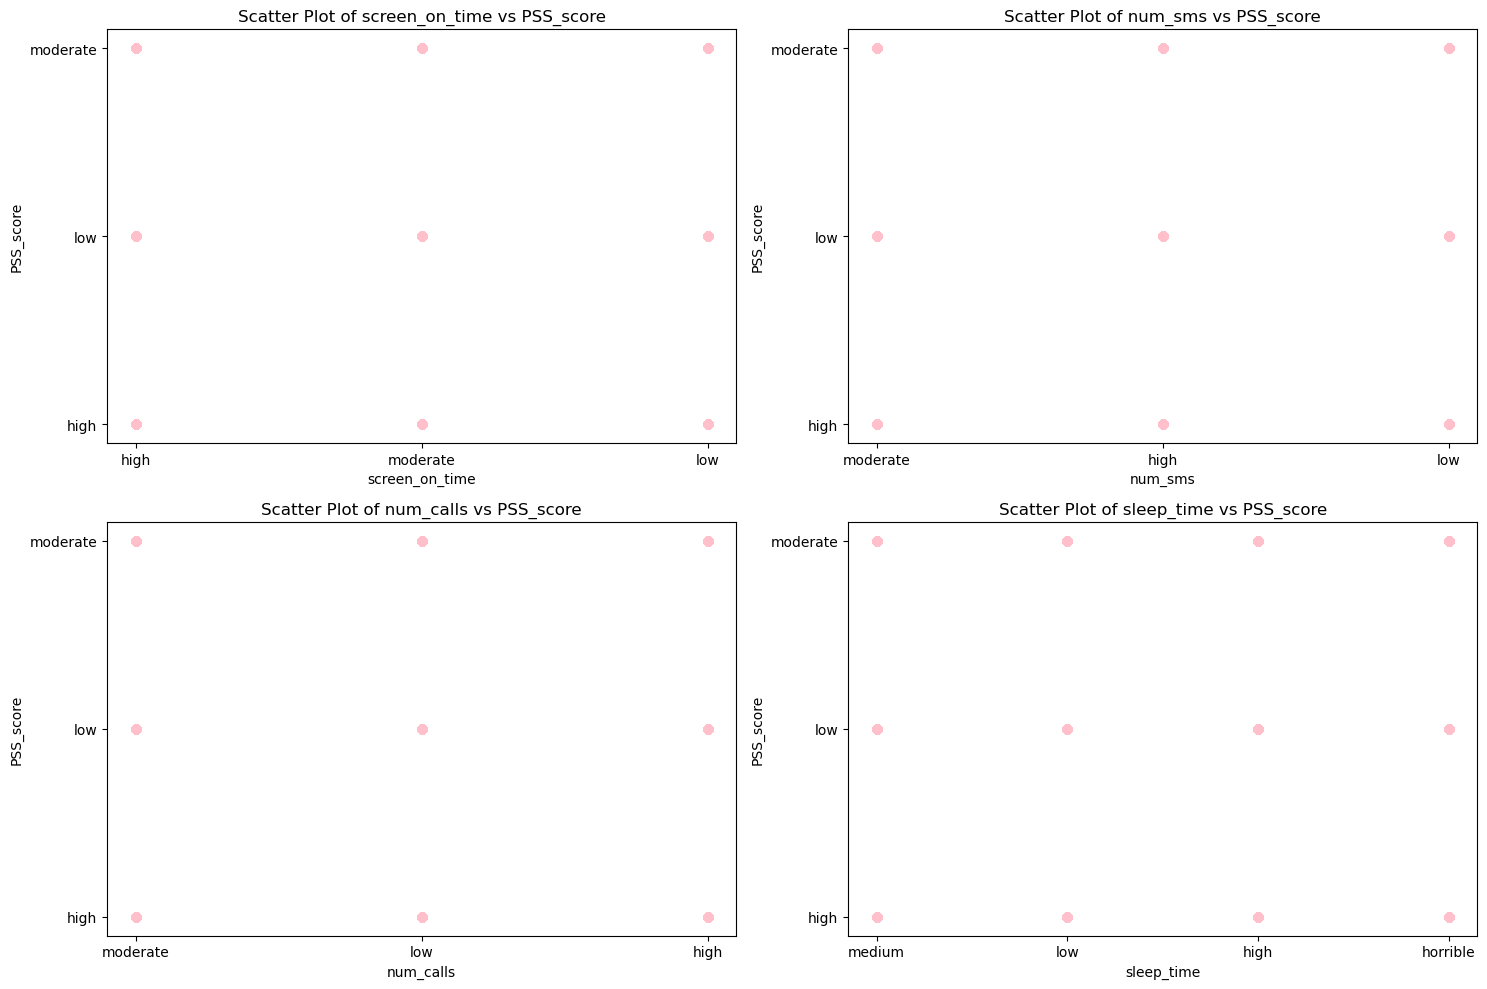

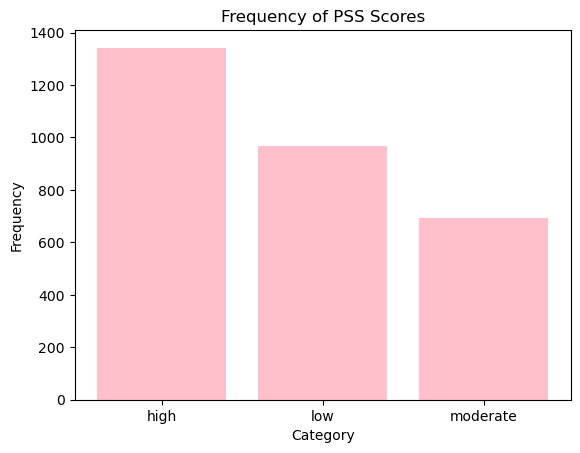

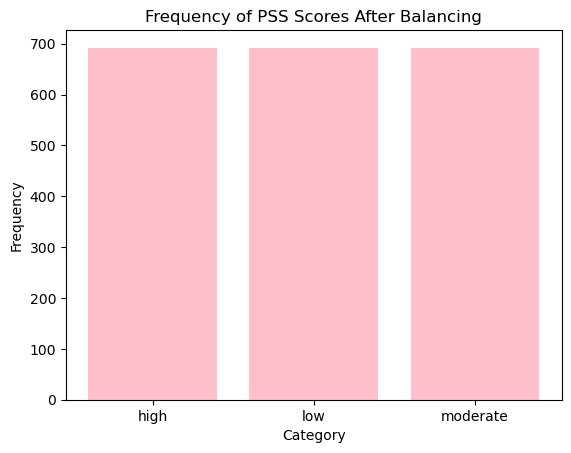

In [6]:
run_all()